## 1. Read XML file

/home/zhihao/anaconda3/envs/CarlaPractices/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


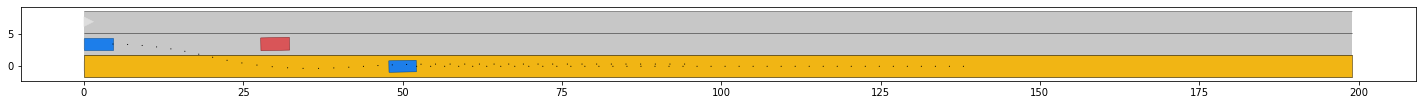

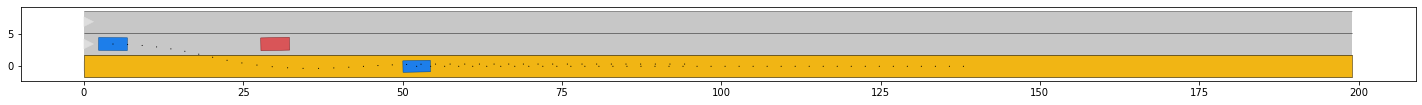

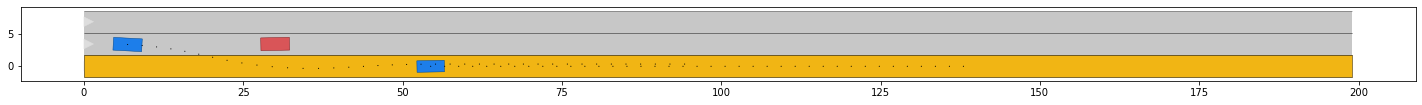

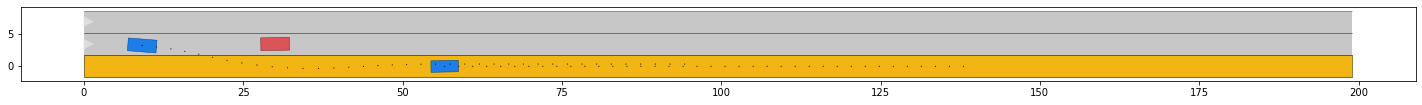

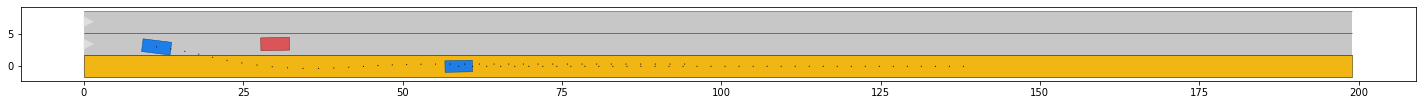

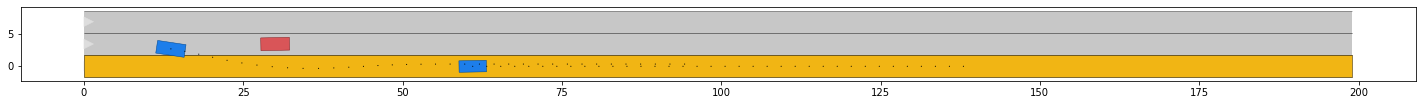

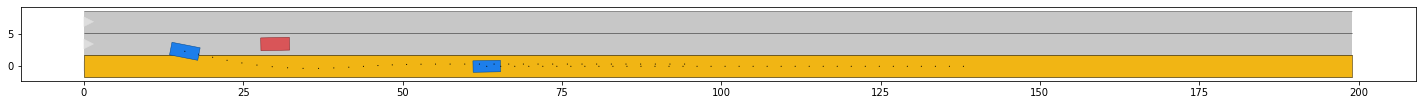

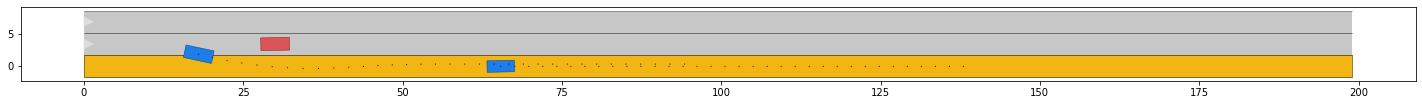

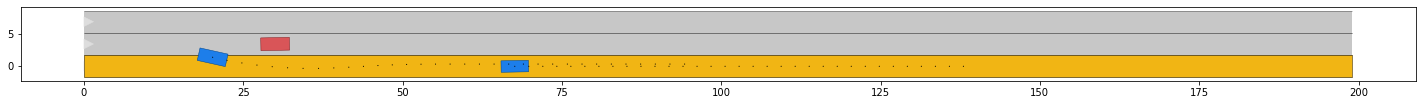

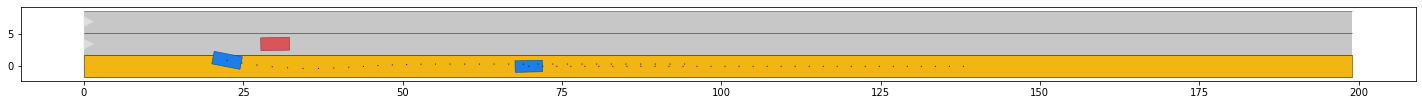

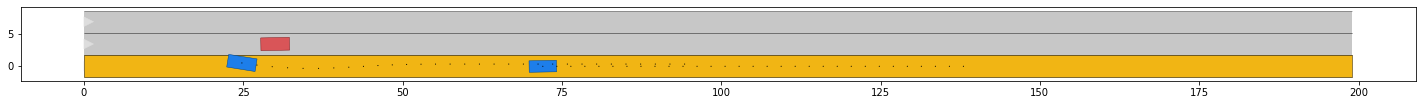

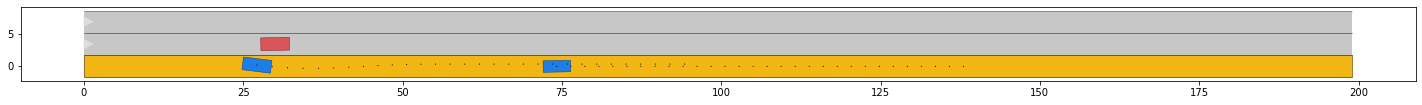

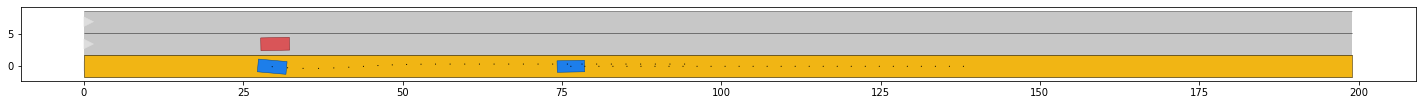

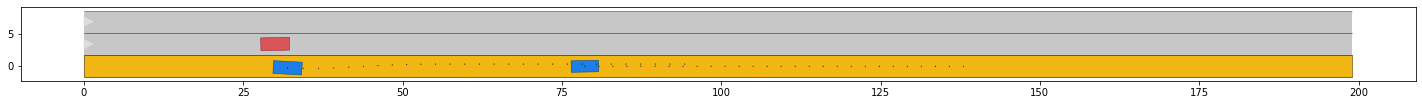

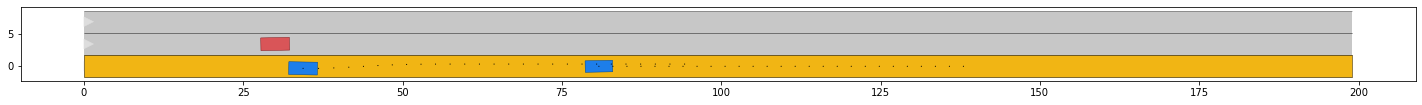

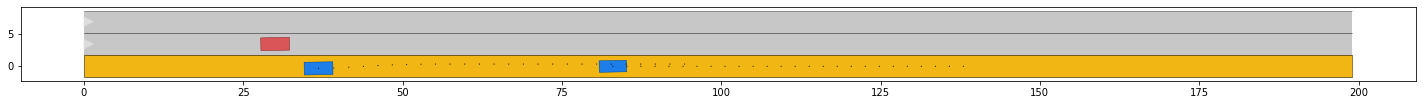

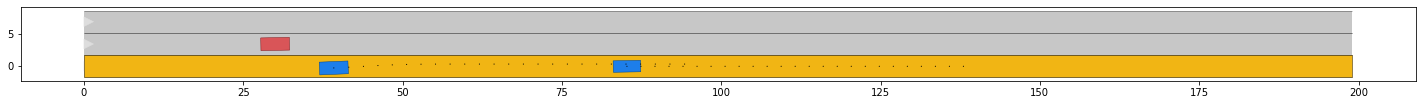

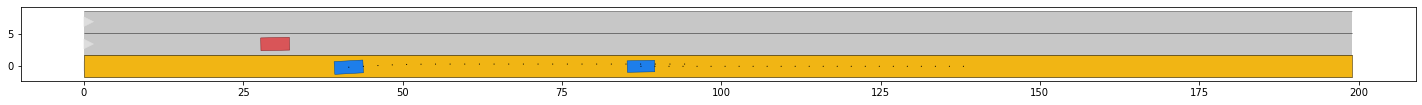

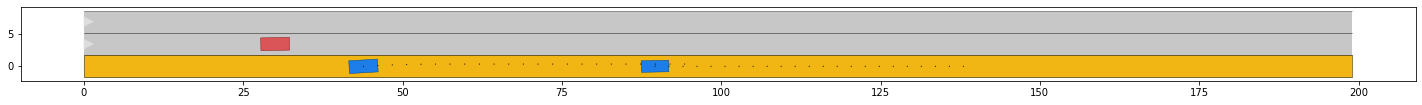

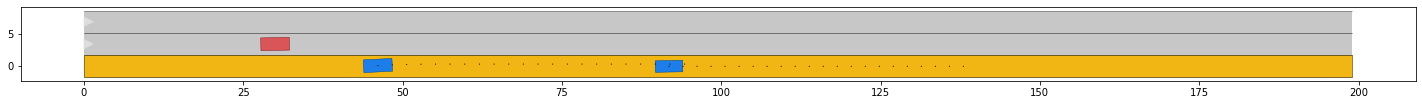

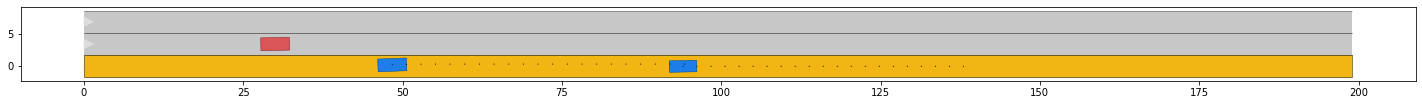

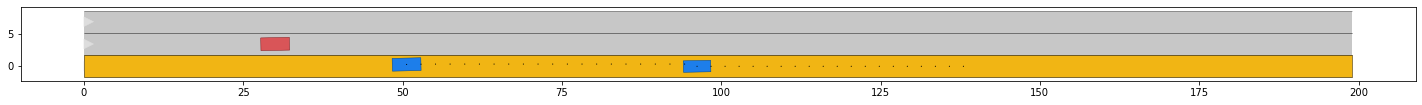

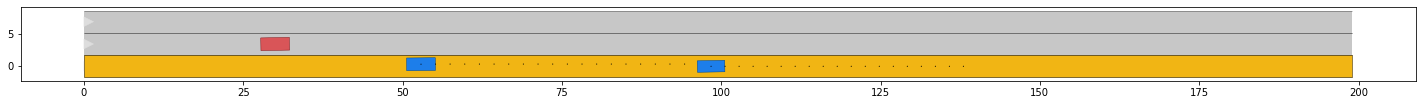

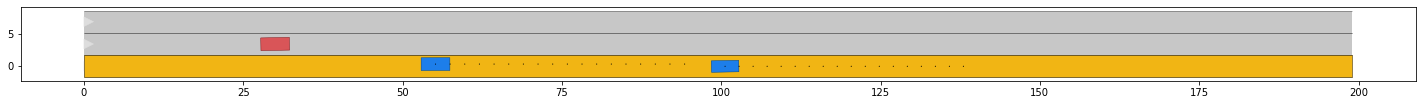

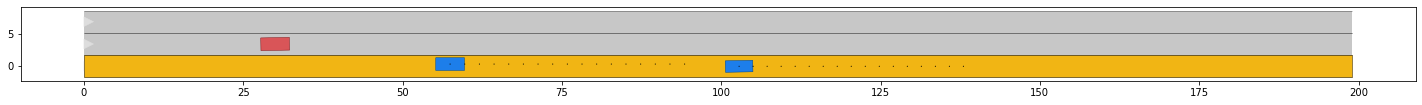

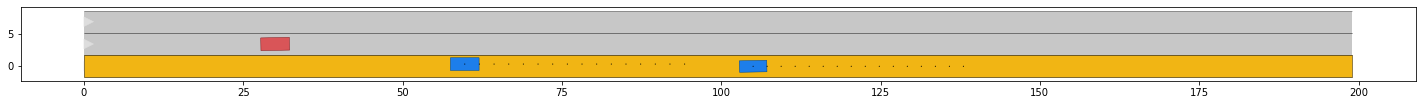

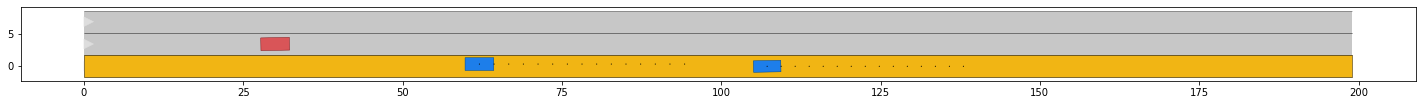

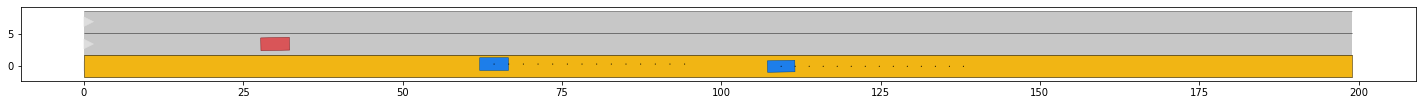

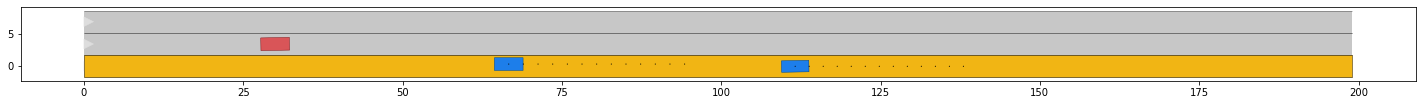

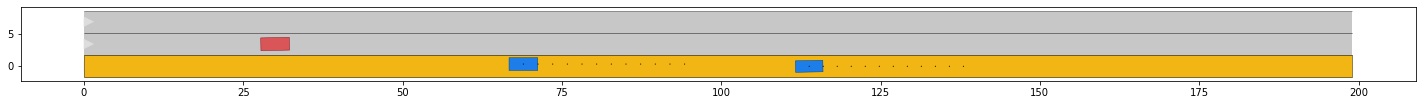

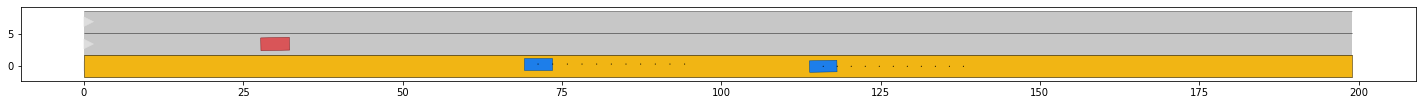

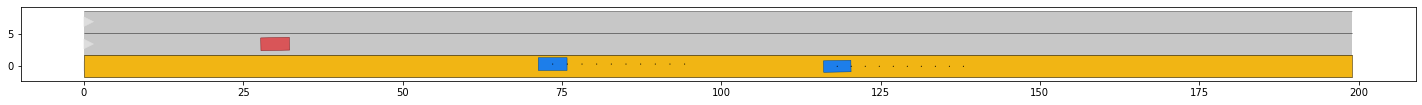

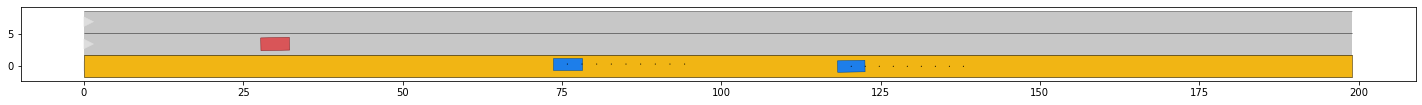

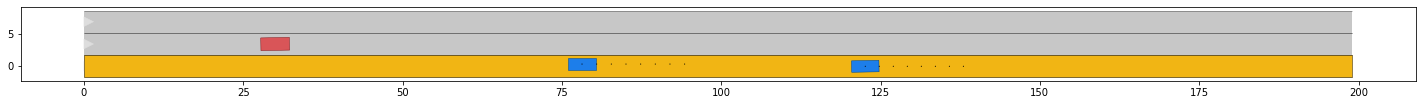

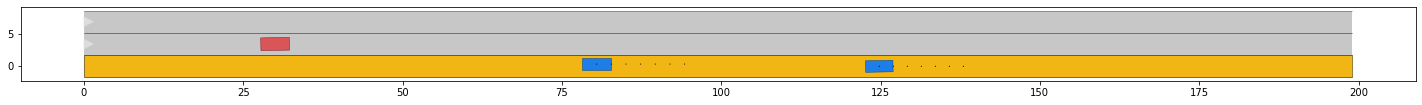

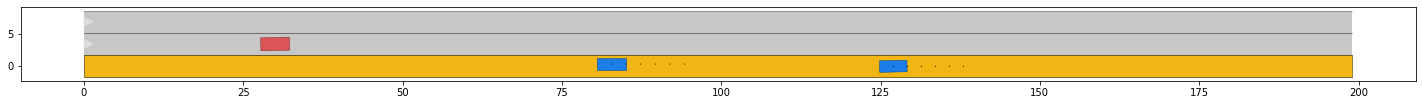

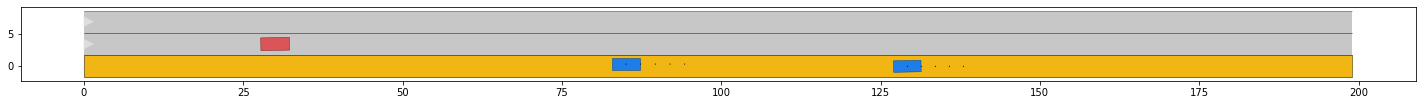

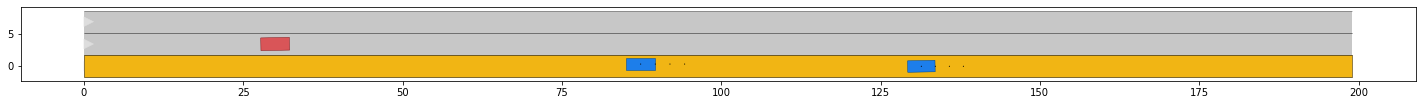

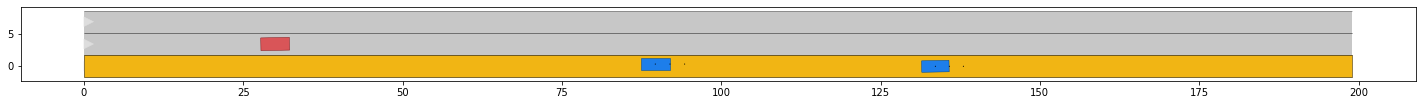

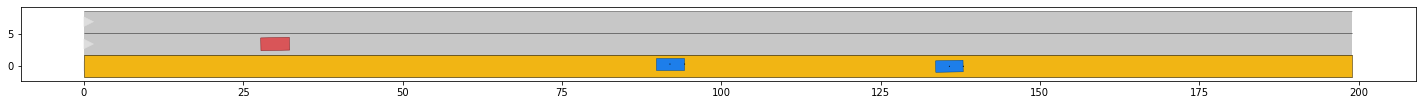

In [44]:
import os
import matplotlib.pyplot as plt
from IPython import display

# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer

# generate path of the file to be opened
file_path = "/home/zhihao/PycharmProjects/CarlaPractices/scenario_xml/ZAM_Tutorial-1_1_T-1.xml"

# read in the scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 40):
    plt.figure(figsize=(25, 10))
    rnd = MPRenderer()
    # plot the scenario at different time step
    scenario.draw(rnd, draw_params={'time_begin': i})
    # plot the planning problem set
    planning_problem_set.draw(rnd)
    rnd.render()

## 2. Modify XML file

###  2.1 StaticObstacle

static_obstacle_id 
 45
static_obstacle_type 
 ObstacleType.PARKED_VEHICLE
static_obstacle_shape 
 Rectangle: 
	 width: 2.0 
	 length: 8 
	 center: [0. 0.] 
	 orientation: 0.0 

static_obstacle_initial_state 
 
position= [80.  0.]
orientation= 0.01
time_step= 3



/home/zhihao/anaconda3/envs/CarlaPractices/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


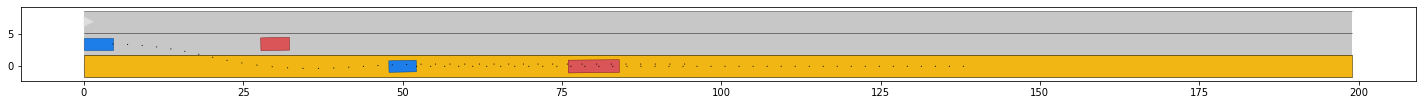

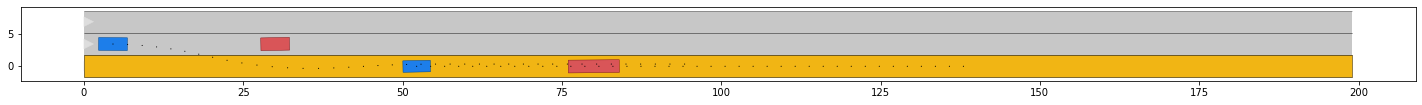

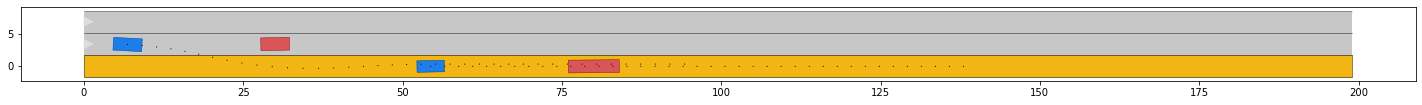

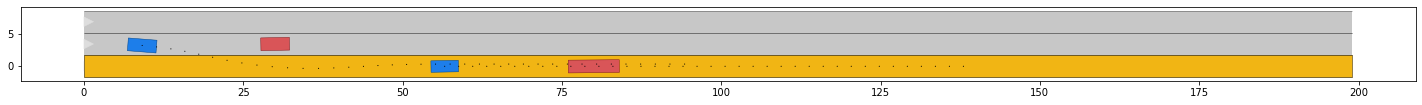

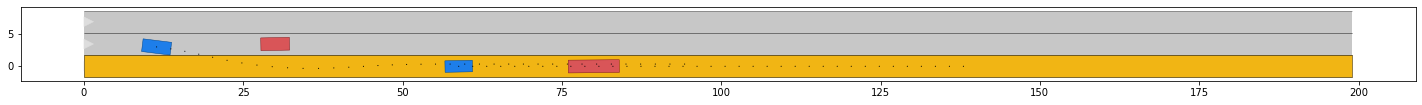

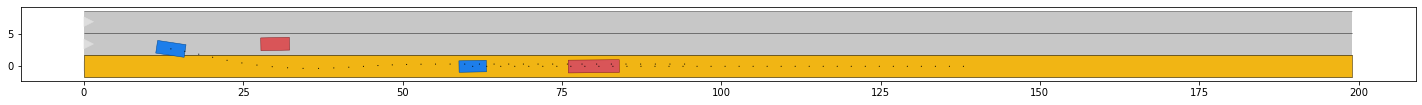

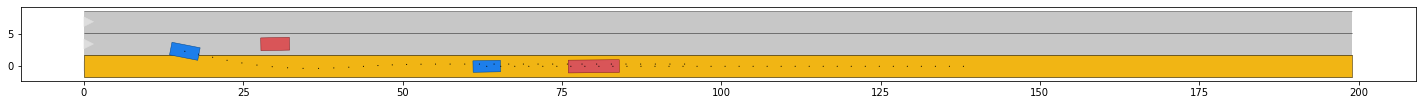

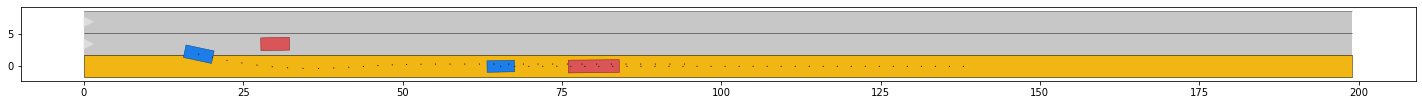

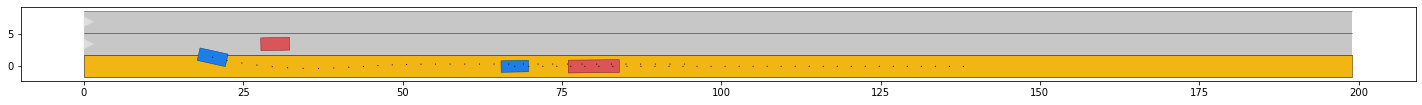

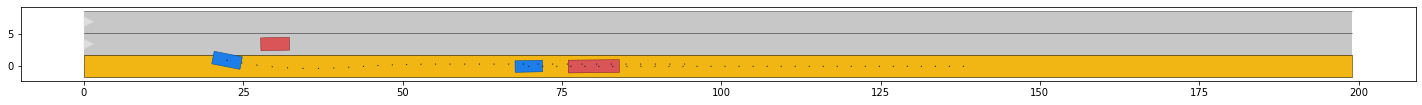

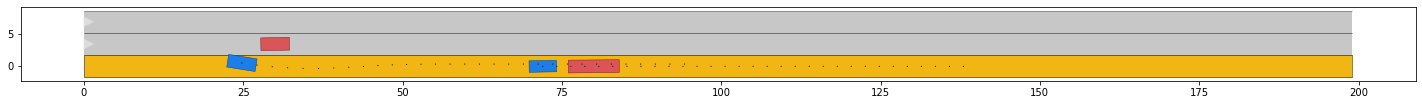

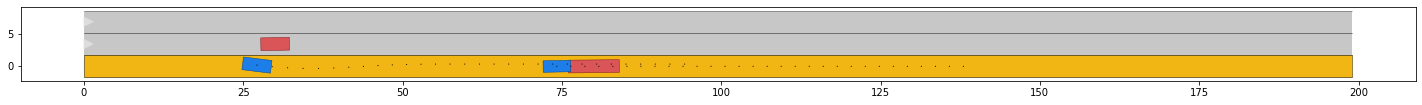

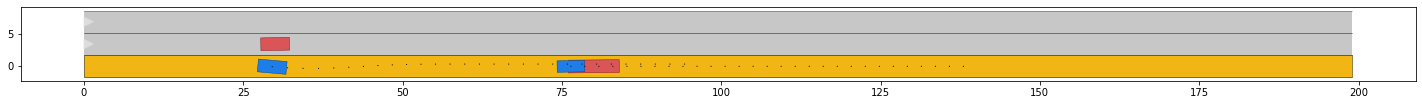

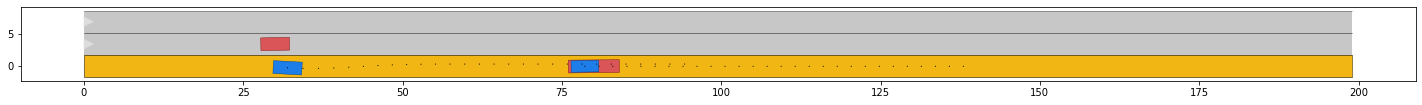

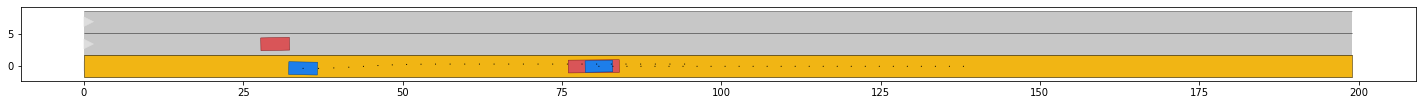

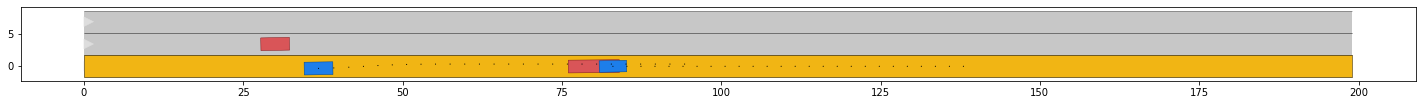

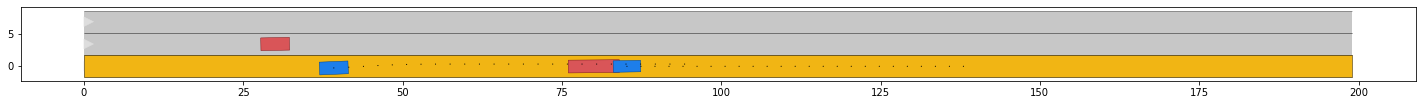

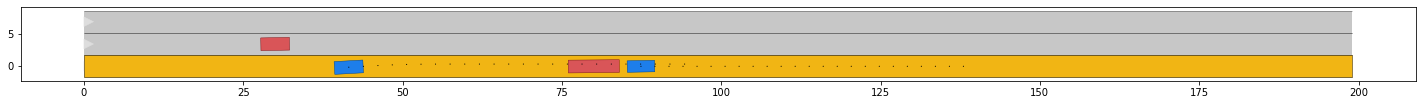

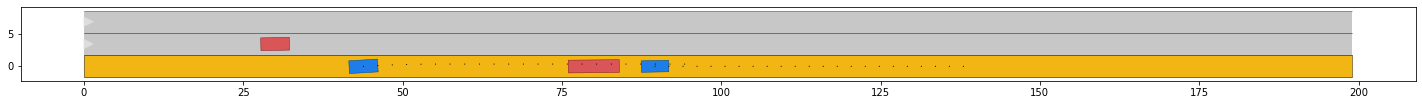

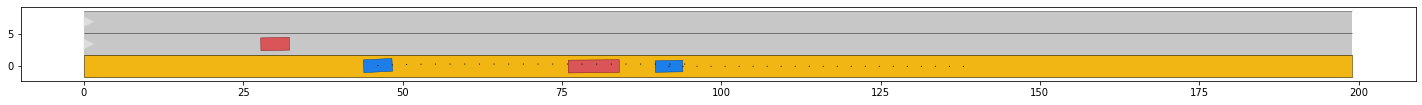

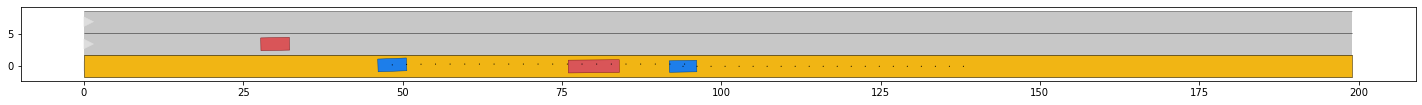

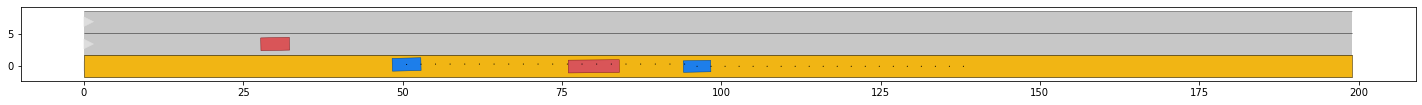

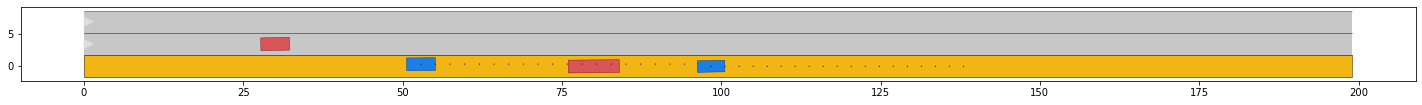

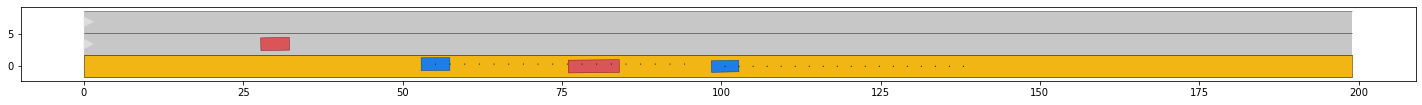

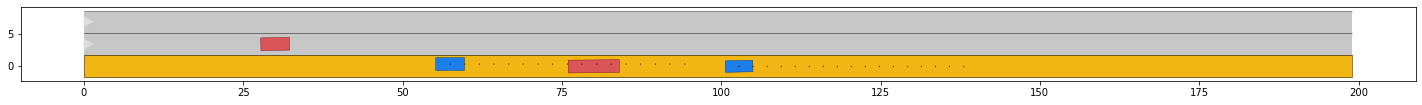

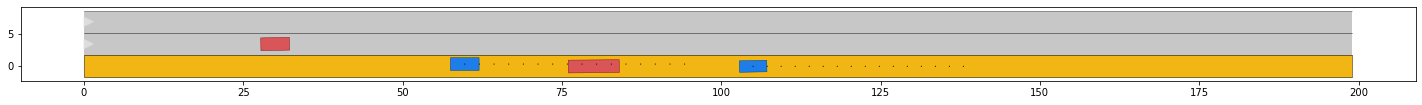

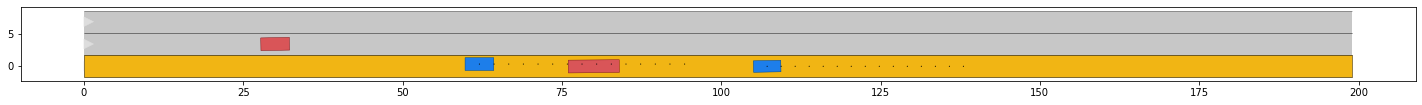

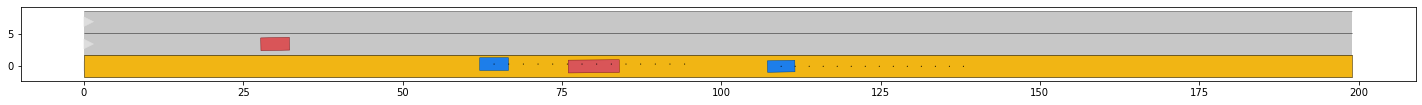

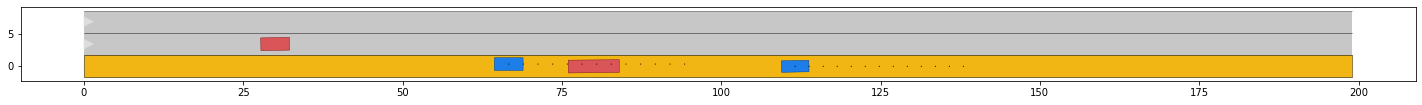

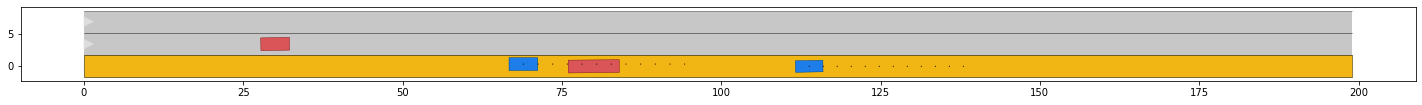

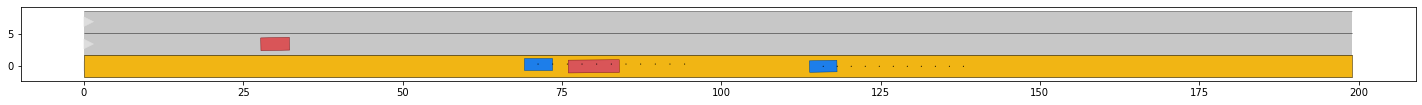

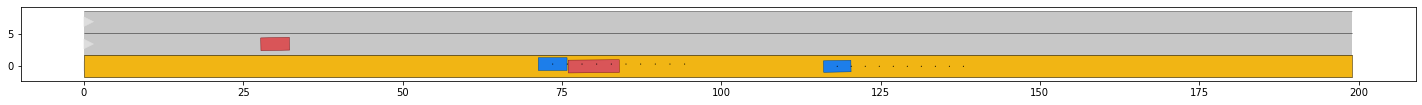

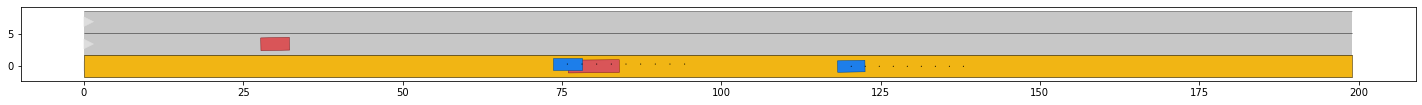

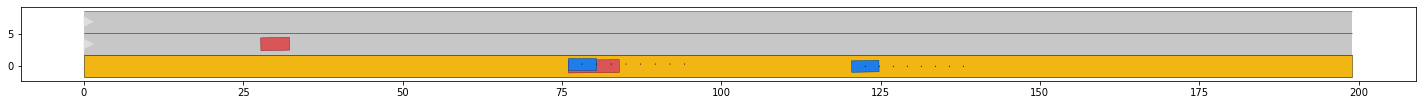

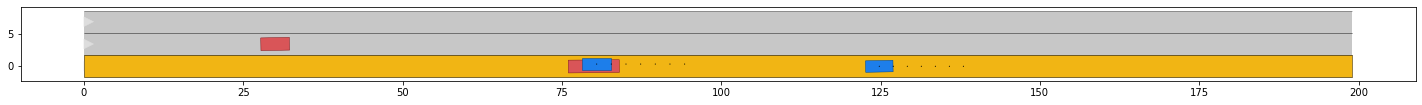

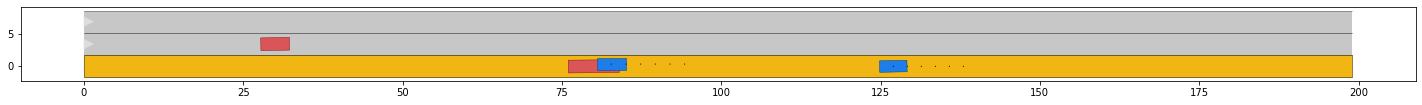

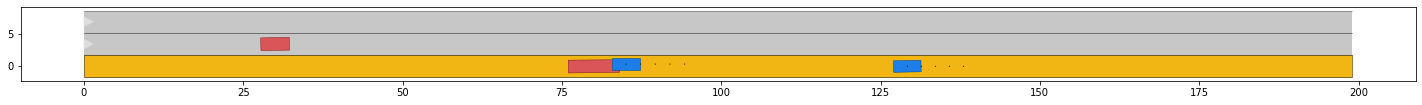

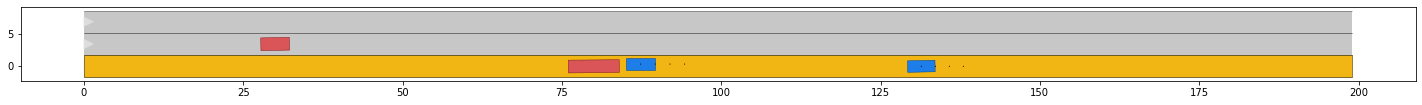

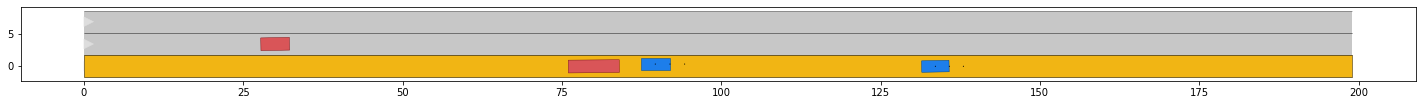

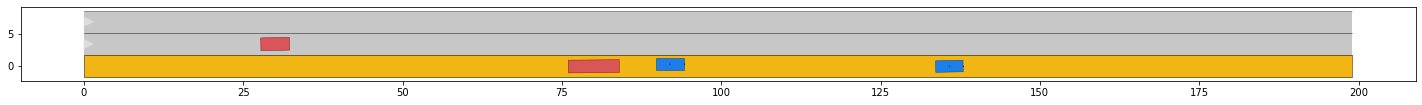

In [45]:
import numpy as np

# import necessary classes from different modules
from commonroad.geometry.shape import Rectangle, Circle
from commonroad.scenario.obstacle import StaticObstacle, ObstacleType
from commonroad.scenario.trajectory import State

# read in the scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

# generate the static obstacle according to the specification, refer to API for details of input parameters
static_obstacle_id = scenario.generate_object_id()
print("static_obstacle_id \n",static_obstacle_id)

static_obstacle_type = ObstacleType.PARKED_VEHICLE
print("static_obstacle_type \n",static_obstacle_type)

static_obstacle_shape = Rectangle(width = 2.0, length = 8)
print("static_obstacle_shape \n",static_obstacle_shape)

static_obstacle_initial_state = State(position = np.array([80.0, 0]), orientation = 0.01, time_step = 3)
print("static_obstacle_initial_state \n",static_obstacle_initial_state)

# feed in the required components to construct a static obstacle
static_obstacle = StaticObstacle(static_obstacle_id, static_obstacle_type, static_obstacle_shape, static_obstacle_initial_state)

# add the static obstacle to the scenario
scenario.add_objects(static_obstacle)

# plot the scenario for each time step
for i in range(0, 40):
    plt.figure(figsize=(25, 10))
    rnd = MPRenderer()
    scenario.draw(rnd, draw_params={'time_begin': i})
    planning_problem_set.draw(rnd)
    rnd.render()

### 2.2 DynamicObstacle

dynamic_obstacle_initial_state 
 
position= [90.  0.]
orientation= 0.02
velocity= 20
time_step= 0

new_position 
 [92.  0.]
new_state 
 
position= [92.  0.]
orientation= -0.02
velocity= 20
time_step= 1

state_list 
new_position 
 [94.  0.]
new_state 
 
position= [94.  0.]
orientation= -0.02
velocity= 20
time_step= 2

state_list 
 [<commonroad.scenario.trajectory.State object at 0x7f065aab9410>, <commonroad.scenario.trajectory.State object at 0x7f065aab9050>]
new_position 
 [96.  0.]
new_state 
 
position= [96.  0.]
orientation= -0.02
velocity= 20
time_step= 3

state_list 
 [<commonroad.scenario.trajectory.State object at 0x7f065aab9410>, <commonroad.scenario.trajectory.State object at 0x7f065aab9050>, <commonroad.scenario.trajectory.State object at 0x7f065aab9190>]
new_position 
 [98.  0.]
new_state 
 
position= [98.  0.]
orientation= -0.02
velocity= 20
time_step= 4

state_list 
 [<commonroad.scenario.trajectory.State object at 0x7f065aab9410>, <commonroad.scenario.trajectory.State obj

/home/zhihao/anaconda3/envs/CarlaPractices/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


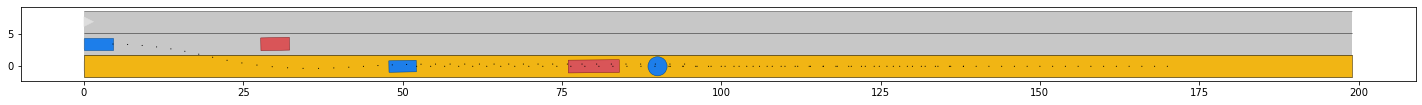

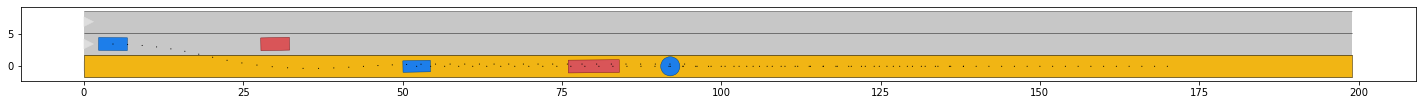

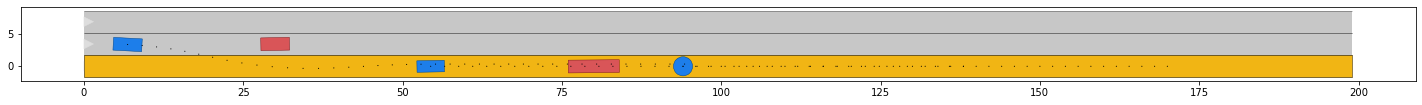

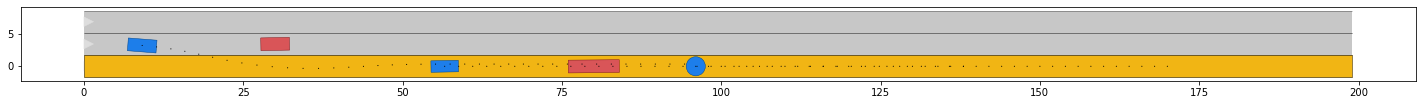

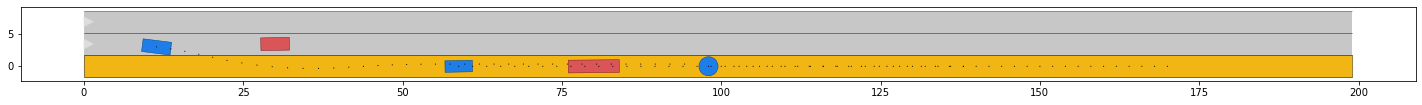

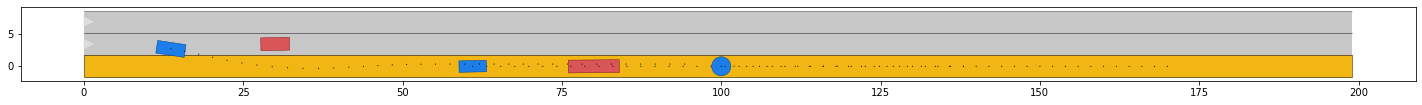

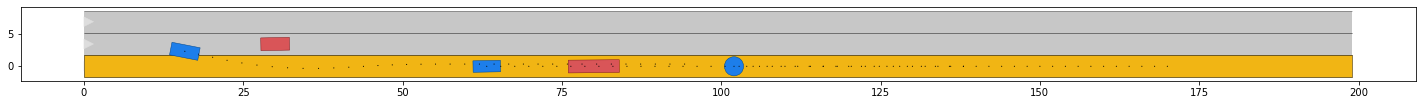

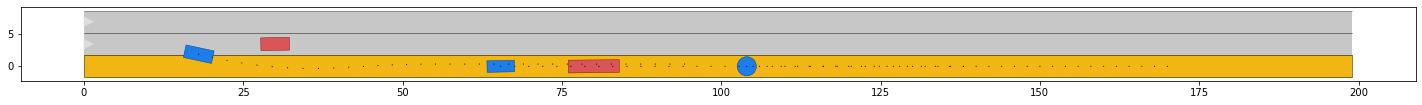

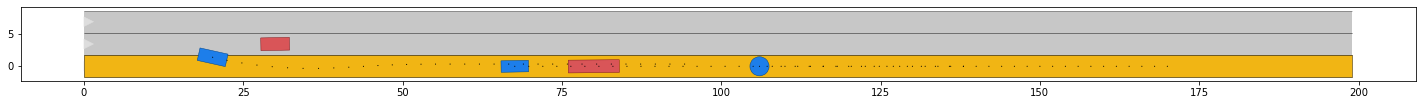

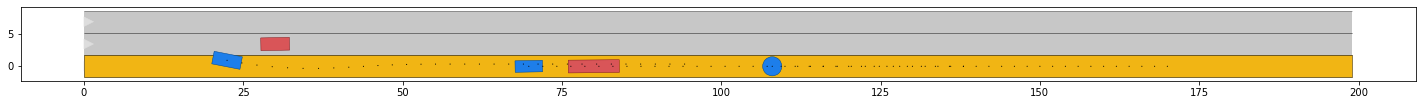

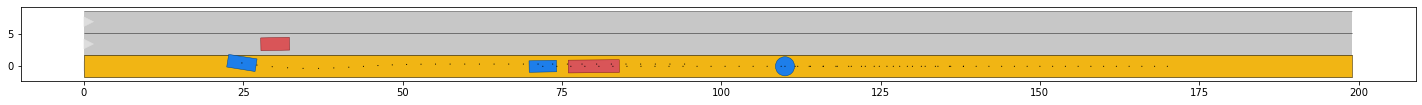

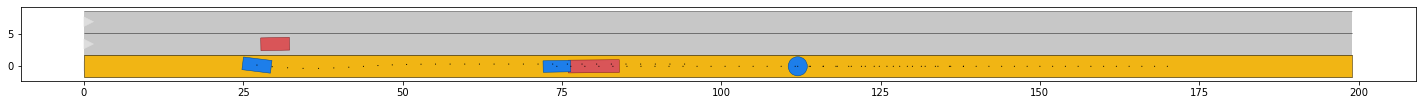

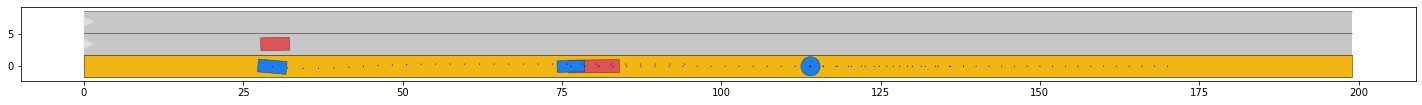

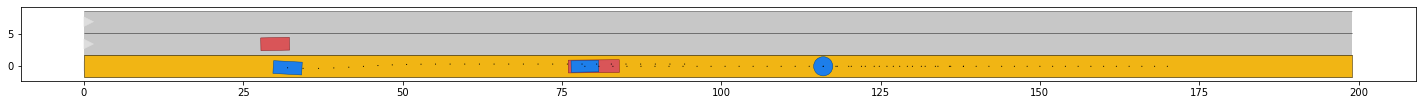

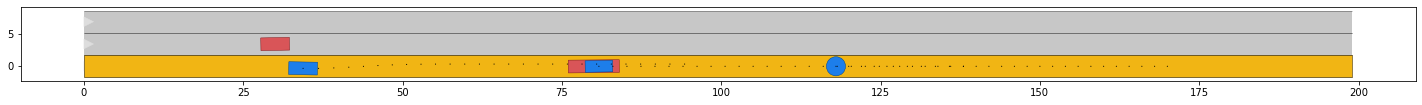

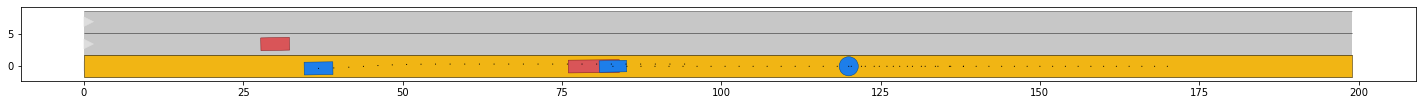

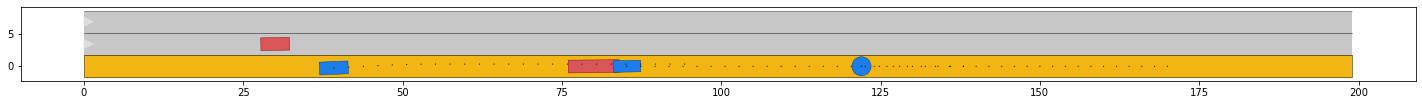

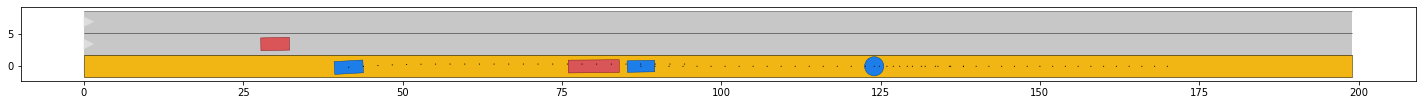

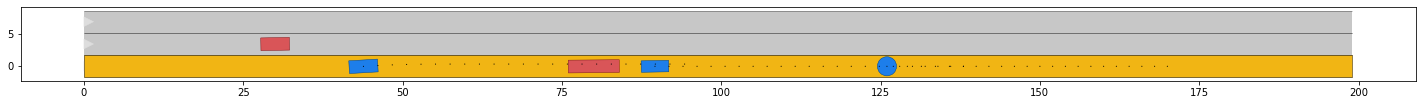

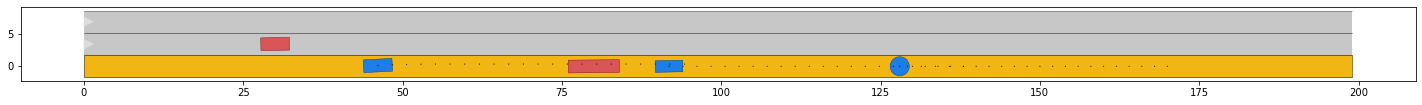

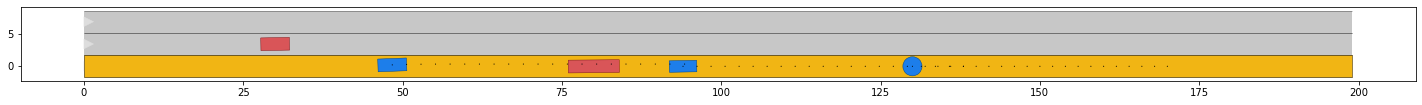

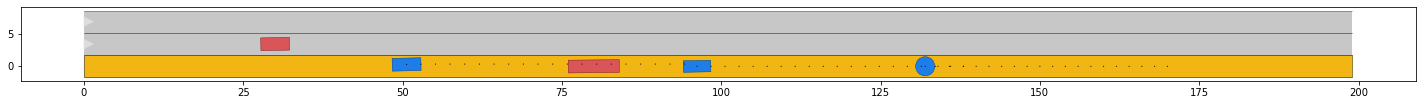

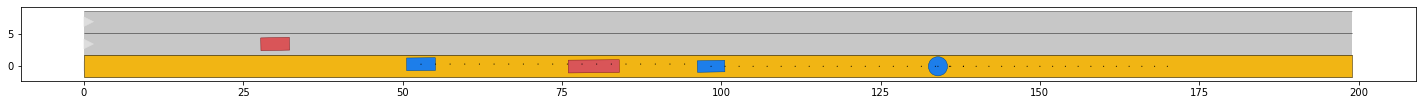

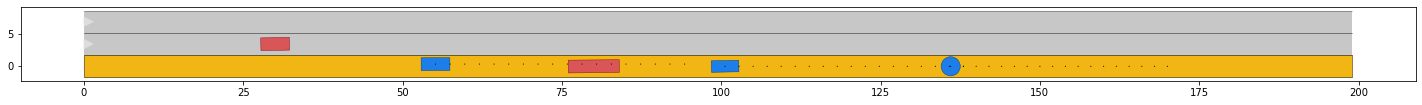

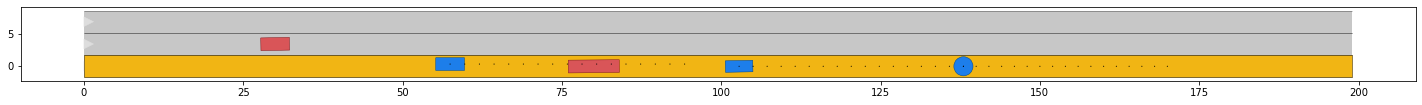

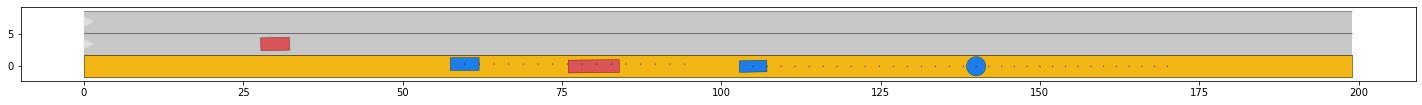

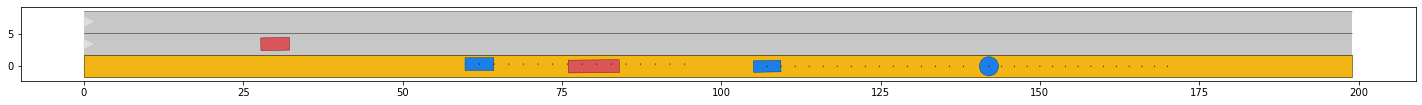

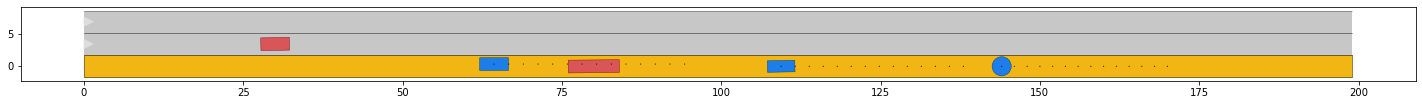

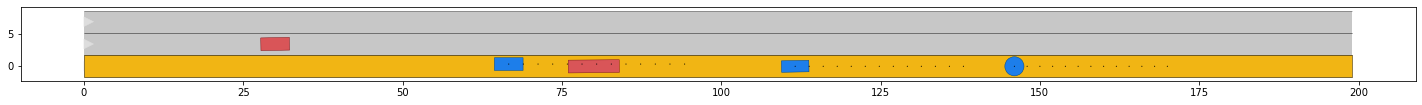

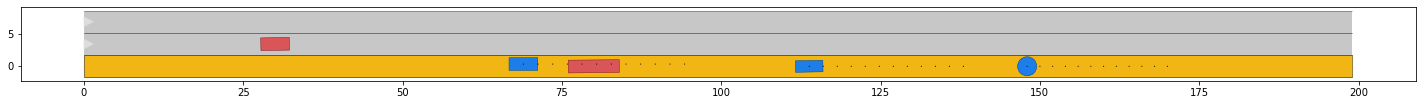

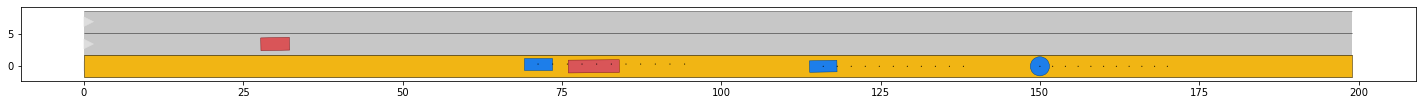

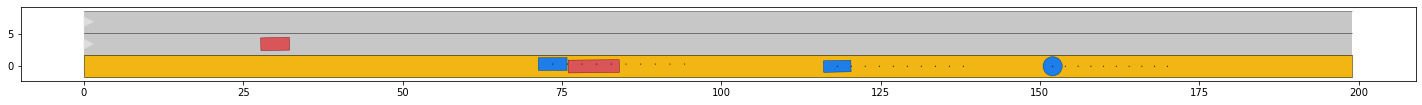

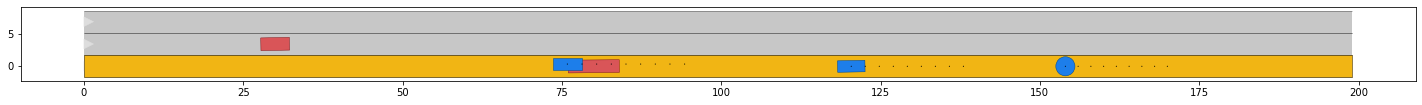

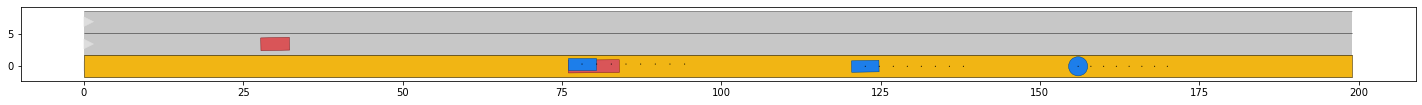

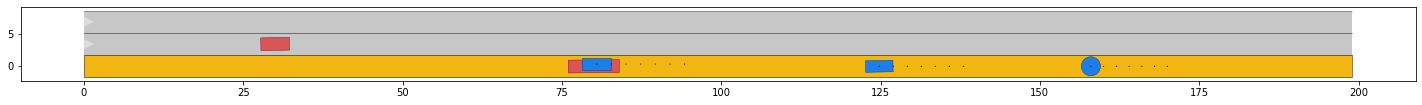

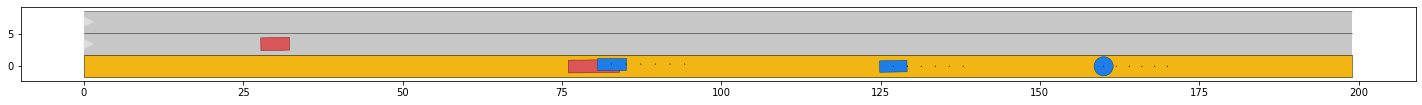

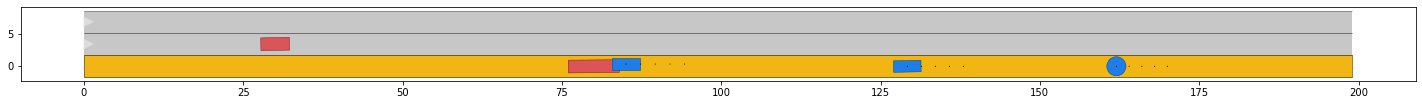

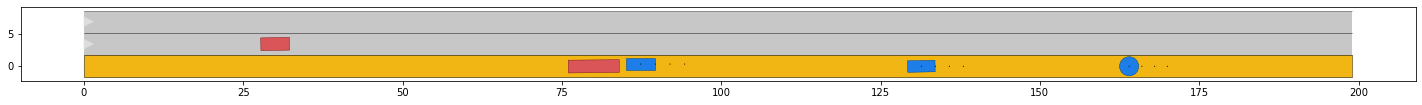

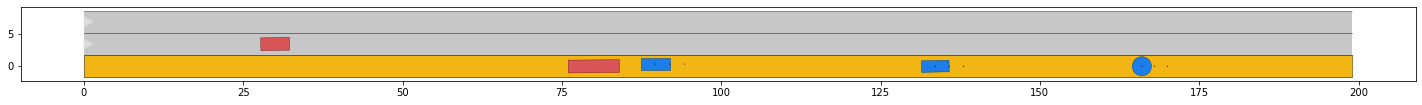

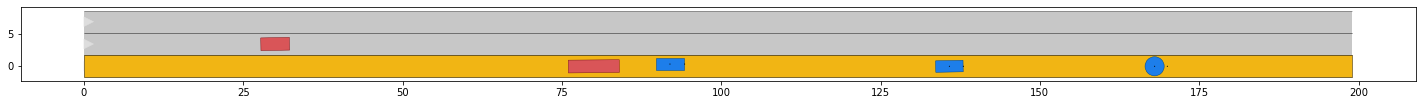

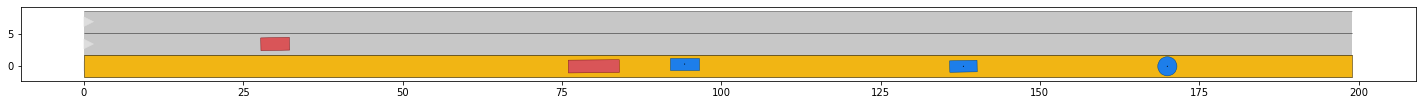

In [46]:
# import necessary classes from different modules
from commonroad.geometry.shape import Circle
from commonroad.scenario.obstacle import DynamicObstacle
from commonroad.scenario.trajectory import Trajectory
from commonroad.prediction.prediction import TrajectoryPrediction

# initial state has a time step of 0
dynamic_obstacle_initial_state = State(position = np.array([90.0, 0.0]),
                                       velocity = 20,
                                       orientation = 0.02,
                                       time_step = 0)
print("dynamic_obstacle_initial_state \n",dynamic_obstacle_initial_state)

# generate the states for the obstacle for time steps 1 to 40 by assuming constant velocity
state_list = []
for i in range(1, 41):
    # compute new position
    new_position = np.array([dynamic_obstacle_initial_state.position[0] + scenario.dt * i * 20, 0])
    print("new_position \n",new_position)
    
    # create new state
    new_state = State(position = new_position, velocity = 20,orientation = -0.02, time_step = i)
    print("new_state \n", new_state)
    # add new state to state_list
    state_list.append(new_state)
    print("state_list \n", state_list)

# create the trajectory of the obstacle, starting at time step 1
dynamic_obstacle_trajectory = Trajectory(1, state_list)
print("dynamic_obstacle_trajectory \n",dynamic_obstacle_trajectory)

# create the prediction using the trajectory and the shape of the obstacle
dynamic_obstacle_shape = Circle(radius = 1.5)
print("dynamic_obstacle_shape \n",dynamic_obstacle_shape)
      
dynamic_obstacle_prediction = TrajectoryPrediction(dynamic_obstacle_trajectory, dynamic_obstacle_shape)
print("dynamic_obstacle_prediction \n", dynamic_obstacle_prediction)

# generate the dynamic obstacle according to the specification
dynamic_obstacle_id = scenario.generate_object_id()
print("dynamic_obstacle_id \n",dynamic_obstacle_id)

dynamic_obstacle_type = ObstacleType.CAR
print("dynamic_obstacle_type \n",dynamic_obstacle_type)

dynamic_obstacle = DynamicObstacle(dynamic_obstacle_id,
                                   dynamic_obstacle_type,
                                   dynamic_obstacle_shape,
                                   dynamic_obstacle_initial_state,
                                   dynamic_obstacle_prediction)
print("dynamic_obstacle \n",dynamic_obstacle)

# add dynamic obstacle to the scenario
scenario.add_objects(dynamic_obstacle)

# plot the scenario for each time step
for i in range(0, 41):
    plt.figure(figsize=(25, 10))
    rnd = MPRenderer()
    scenario.draw(rnd, draw_params={'time_begin': i})
    planning_problem_set.draw(rnd)
    rnd.render()

## 3. Write XML file

In [47]:
# import necessary classes from different modules
from commonroad.common.file_writer import CommonRoadFileWriter
from commonroad.common.file_writer import OverwriteExistingFile
from commonroad.scenario.scenario import Location
from commonroad.scenario.scenario import Tag

author = 'Zhihao Yang'
affiliation = 'Technical University of Munich, Germany'
source = 'XYZ'
tags = {Tag.CRITICAL, Tag.INTERSTATE}

# write new scenario
fw = CommonRoadFileWriter(scenario, planning_problem_set, author, affiliation, source, tags)

filename = "ZAM_Tutorial-1_1_T-z1.xml"
fw.write_to_file(filename, OverwriteExistingFile.ALWAYS)

/home/zhihao/anaconda3/envs/CarlaPractices/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


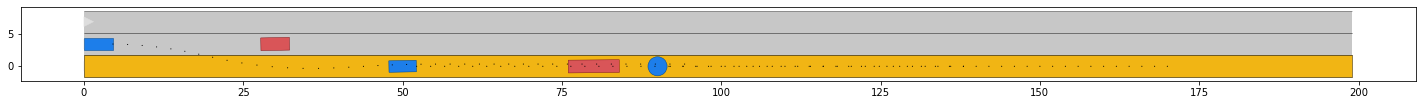

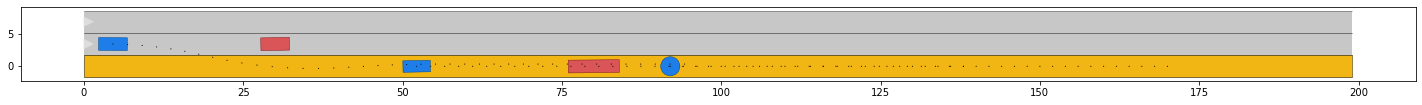

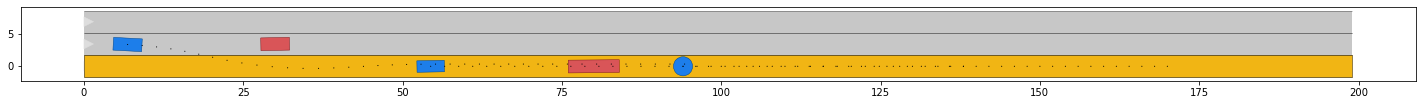

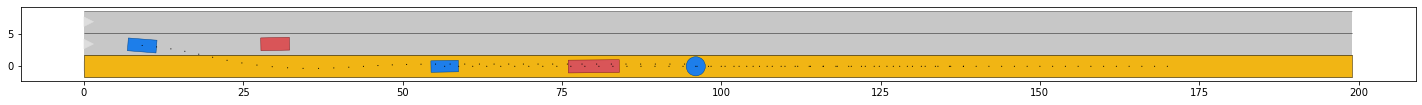

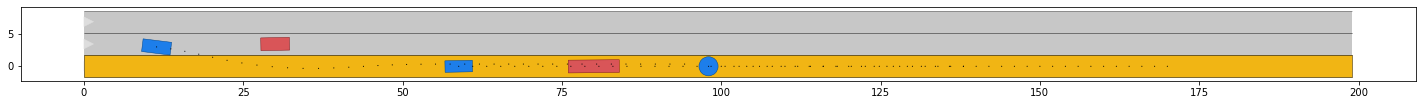

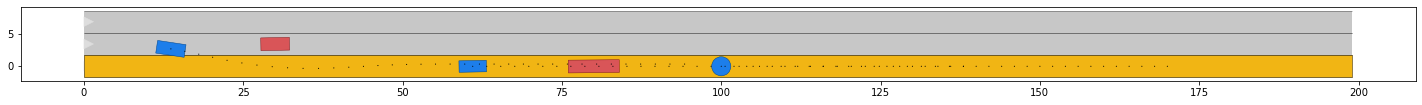

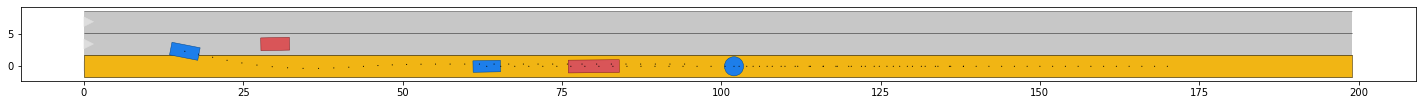

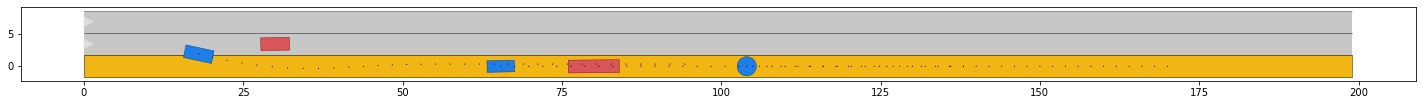

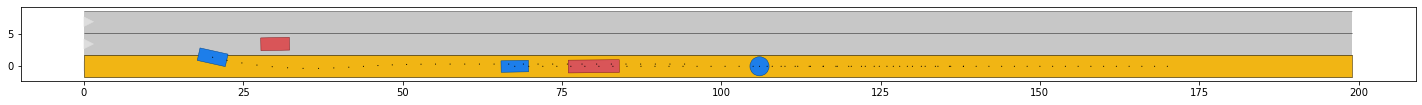

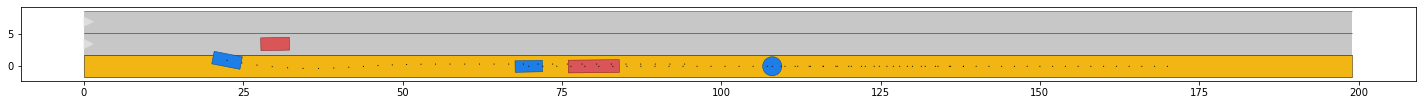

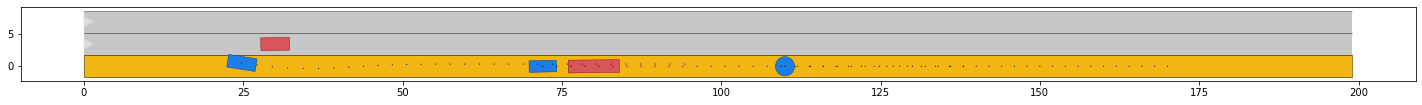

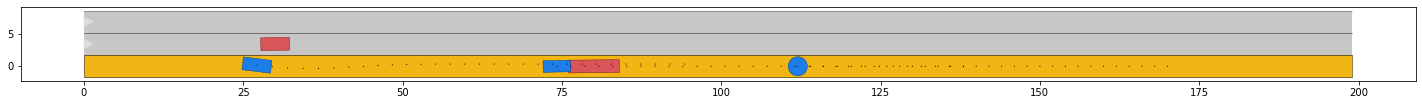

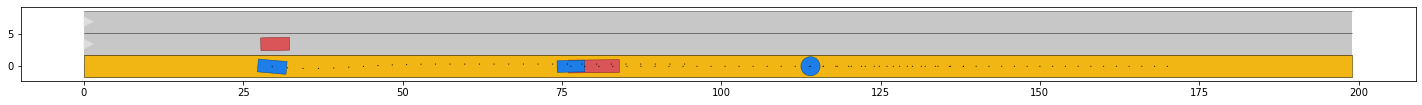

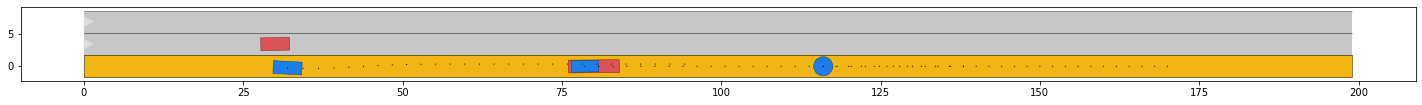

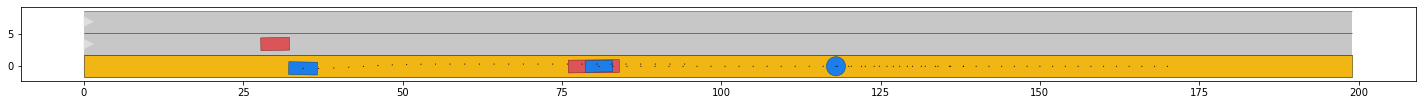

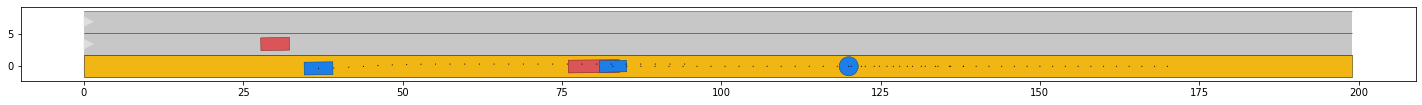

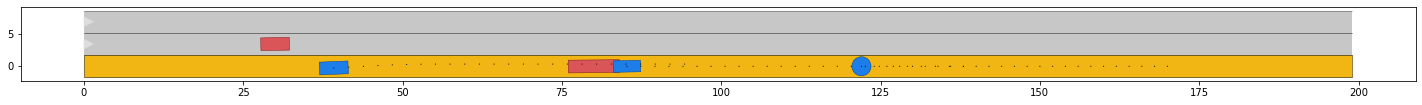

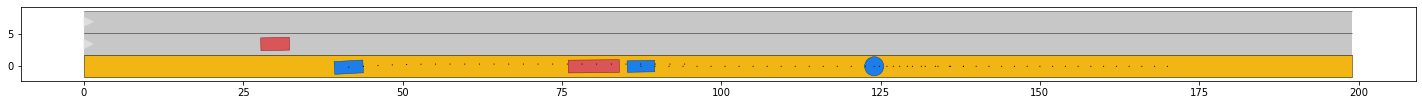

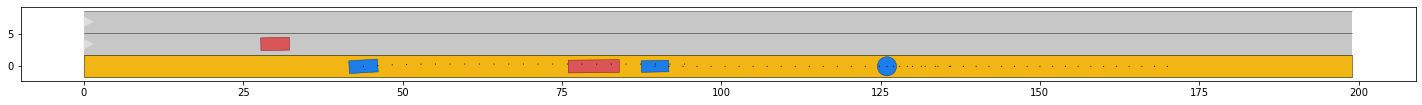

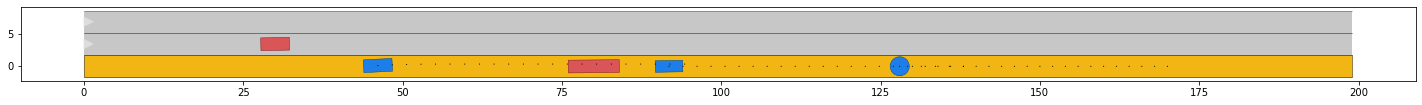

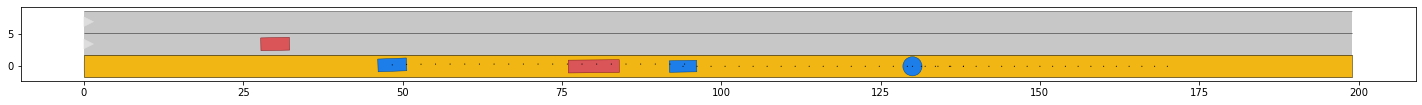

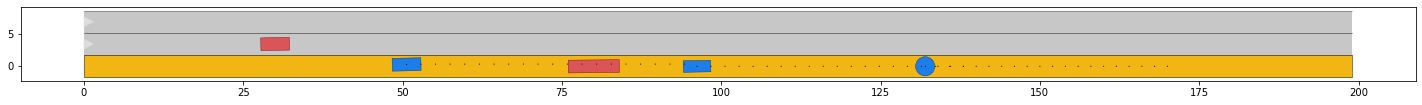

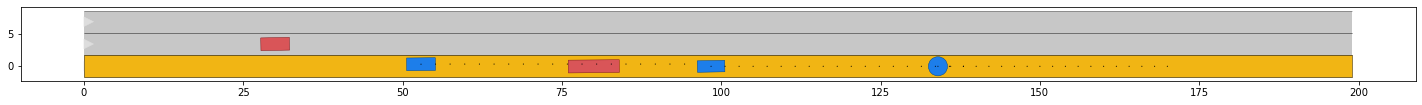

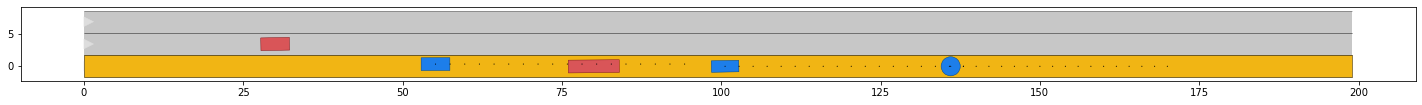

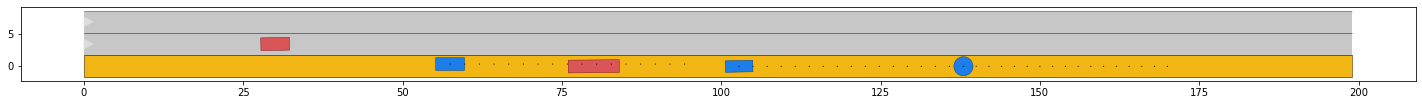

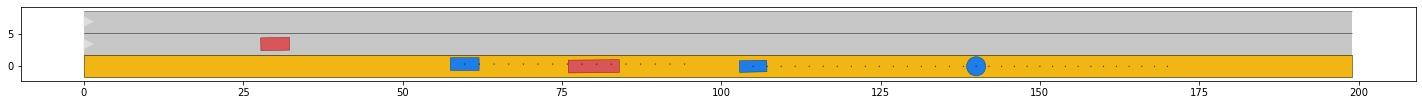

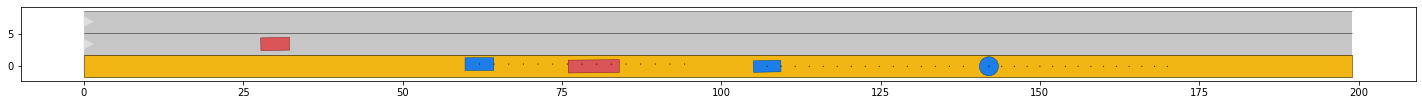

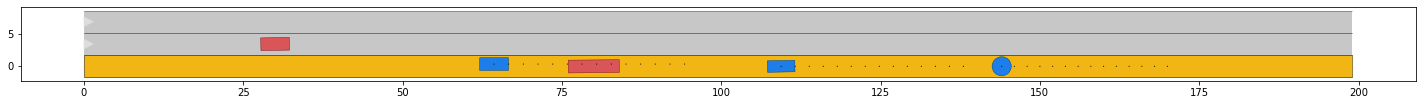

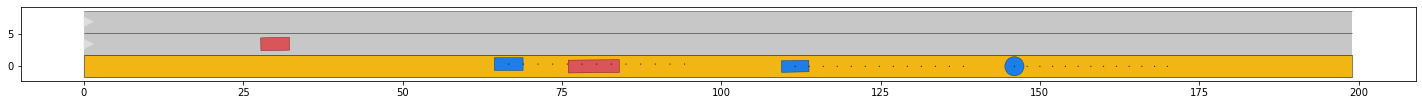

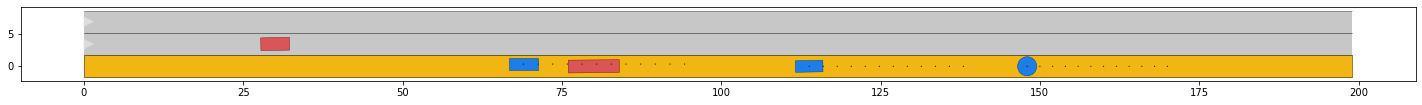

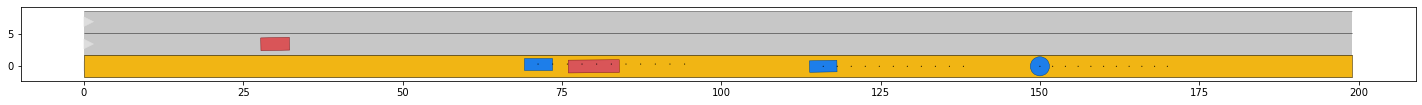

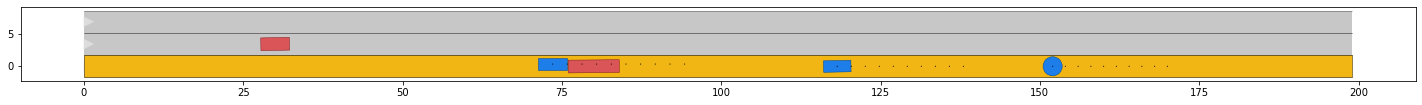

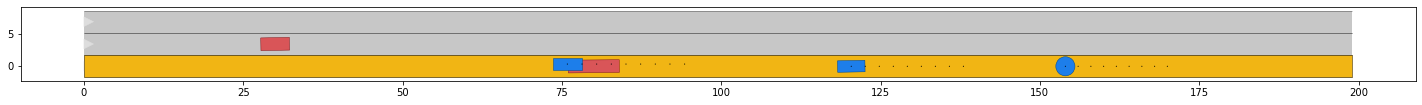

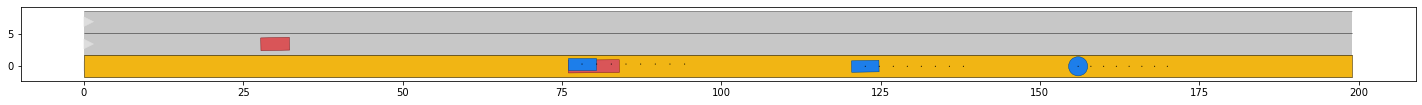

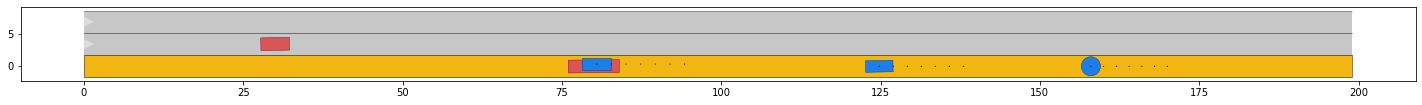

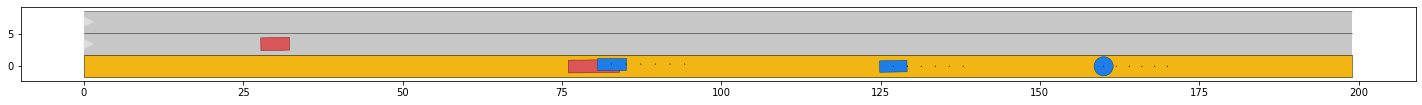

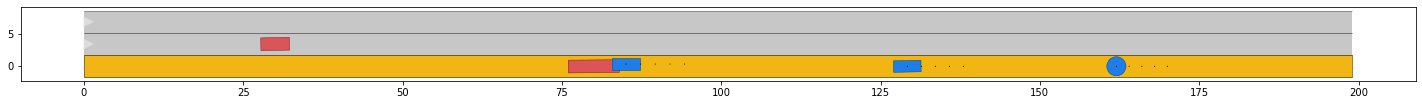

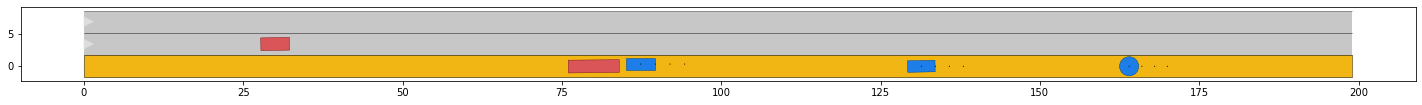

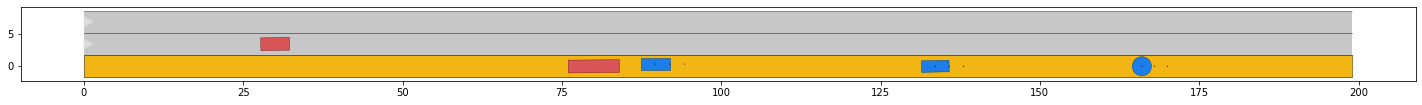

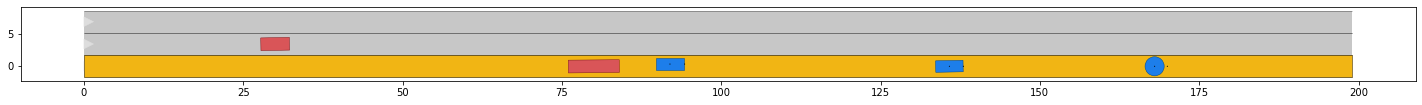

In [48]:
file_path = "ZAM_Tutorial-1_1_T-z1.xml"

scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

# plot the scenario for each time step
for i in range(0, 40):
    plt.figure(figsize=(25, 10))
    rnd = MPRenderer()
    scenario.draw(rnd, draw_params={'time_begin': i})
    planning_problem_set.draw(rnd)
    rnd.render()